In [1]:
#Depencies + extras in case
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,r2_score
import sklearn as skl
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
import seaborn as sns
import os


In [2]:
scaled_df = pd.read_csv('scaled_data.csv')
scaled_df

,Unnamed: 0,carat,depth,table,price,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0,0.23,61.5,55.0,326,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,0.21,59.8,61.0,326,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,2,0.23,56.9,65.0,327,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,3,0.29,62.4,58.0,334,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,4,0.31,63.3,58.0,335,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39751,39751,0.72,60.8,57.0,2757,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
39752,39752,0.72,63.1,55.0,2757,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
39753,39753,0.70,62.8,60.0,2757,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
39754,39754,0.86,61.0,58.0,2757,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [28]:
# double checking for null values
scaled_df.dropna()
print(scaled_df.isnull().sum())
scaled_df.info()

Unnamed: 0       0
carat            0
depth            0
table            0
price            0
cut_Fair         0
cut_Good         0
cut_Ideal        0
cut_Premium      0
cut_Very Good    0
color_D          0
color_E          0
color_F          0
color_G          0
color_H          0
color_I          0
color_J          0
clarity_I1       0
clarity_IF       0
clarity_SI1      0
clarity_SI2      0
clarity_VS1      0
clarity_VS2      0
clarity_VVS1     0
clarity_VVS2     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39756 entries, 0 to 39755
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     39756 non-null  int64  
 1   carat          39756 non-null  float64
 2   depth          39756 non-null  float64
 3   table          39756 non-null  float64
 4   price          39756 non-null  int64  
 5   cut_Fair       39756 non-null  int64  
 6   cut_Good       39756 non-null  int64  
 7   cu

# Linear Regression Model


### Create Y and x matrices

In [3]:
X = scaled_df.drop(columns=['price'])
y= scaled_df['price']


In [4]:
X.shape,y.shape

((39756, 24), (39756,))

# Splitting the data

In [5]:
X_train, X_test,y_train,y_test= train_test_split(X,y,test_size= 0.20)

### Reviewing our data's dimensions after split

In [6]:
# for x
X_train.shape,X_test.shape

((31804, 24), (7952, 24))

In [7]:
# for y
y_train.shape,y_test.shape

((31804,), (7952,))

## The Model

In [8]:
#dependencies
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,r2_score

creating and defining the Lin_regres model

In [9]:
model = linear_model.LinearRegression()

Building training model

In [10]:
model.fit(X_train, y_train)

LinearRegression()

applying trained model on our test dataset

In [11]:
y_pred = model.predict(X_test)

Perfomance test to see how our model is perfoming so far

In [12]:
print('Coefficients:',model.coef_)
print('Intercept:', model.intercept_)
print('Mean Squared Error(MSE): %.2f'
      % mean_squared_error(y_test,y_pred))
print('Coefficient of Determination (R^2): %.2f'
      % r2_score(y_test,y_pred))

Coefficients: [ 2.04137911e-02  9.30172996e+03 -3.30496778e+01 -2.91391529e+01
 -5.56759049e+02  2.08564587e+01  2.80144775e+02  1.01418744e+02
  1.54339071e+02  8.70623197e+02  6.92789493e+02  6.04738564e+02
  3.52728068e+02 -2.16644208e+02 -7.28224889e+02 -1.57601023e+03
 -3.90073123e+03  1.79858508e+03 -3.12980564e+02 -1.24091490e+03
  7.00064211e+02  3.59388293e+02  1.36382985e+03  1.23275925e+03]
Intercept: -754.4270019584828
Mean Squared Error(MSE): 1606434.44
Coefficient of Determination (R^2): 0.91


# 

Some plots to show how a couple of the features have a direct effect on the price 

In [24]:
#setting up for the plot 
diamond_flag = (scaled_df['carat'] >= 0.80) & (scaled_df['carat'] <= 0.99)
diamonds_sml = scaled_df.loc[diamond_flag,:]


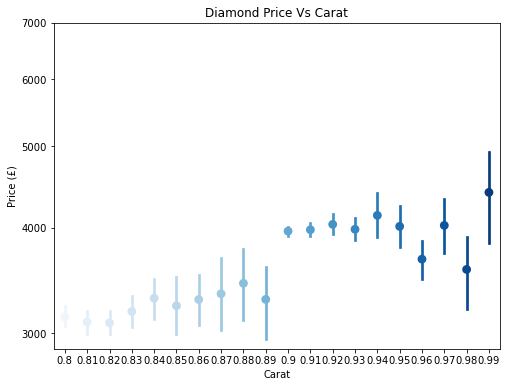

In [25]:
#Price VS Carat plot
fig = plt.figure(figsize = [8,6])
ax = sns.pointplot(data = diamonds_sml, x = 'carat', y = 'price',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Diamond Price Vs Carat')
plt.ylabel('Price (£)')
plt.xlabel('Carat')
plt.yscale('log')
plt.yticks([3e3, 4e3, 5e3,6e3,7e3], ['3000', '4000', '5000','6000','7000'])
ax.set_yticklabels([],minor = True)
plt.show();

More Carats in a diamond mean Higher Price 

C:\Users\Dalit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

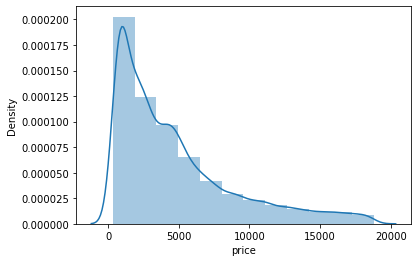

In [26]:
sns.distplot(scaled_df['price'], bins=12, kde=True, rug=False)

Density seems to have less effect on the price especailly in comparison to the effect of carats on price.